In [1]:
from bs4 import BeautifulSoup as bs
import requests 
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def make_url_from_article(article):
    if not "https" in article:
        return "https://de.wikipedia.org/wiki/" + article 
    return None

def get_article_name_from_url(url):
    i = url.rfind("/")
    return url[i+1:]



In [3]:
url =make_url_from_article("syrien")
print(url)
make_url_from_article(url)

https://de.wikipedia.org/wiki/syrien


In [4]:
def check_link(l):
    #print(l)
    forbidden=[":","#",".jpg","Begriffs", ".svg", ".png"]
    if not "/wiki" in l:
        return False
    
    for f in forbidden:
        if f in l:
           # print(l)
            return False
    return True
    
def show_links(article, limit=2):
    url = make_url_from_article(article)
    res = requests.get(url)
    
    html = res.content
    
    content = bs(html, 'html.parser')
    
    links = []
    for link in content.find_all('a', href=True):
        l = link.get("href")
        if check_link(l):   
            links.append(get_article_name_from_url(l))
        if len(links)>limit:
            return links

    return links

In [5]:
show_links("mathe")

['Ortslage', 'Hohnhorst', 'Samtgemeinde_Nenndorf']

In [6]:
def build_graph(G,start_article,n):
    if n==0:
        return
    links = show_links(start_article)
    print(start_article,"------>", links)
    for i in links:
        G.add_edge(start_article,i)
        if n>0:
            build_graph(G, i,n-1)

In [10]:
def end(x,y):    
    G = nx.Graph()
    build_graph(G,x,3)

    aufgabe =nx.shortest_path(G, x, y)
    color_map = ["red" if node in aufgabe else "blue" for node in G]
    plt.figure(figsize=(14,14))
    nx.draw_networkx(G,node_color=color_map)
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()


Von welchem Artikel soll analysiert werden?Aleppo
Was suchen sie in analysiert?Sprache
Aleppo ------> ['World_Geodetic_System_1984', 'Staat', 'Syrien']
World_Geodetic_System_1984 ------> ['Geod%C3%A4sie', 'Geod%C3%A4tisches_Datum', 'Erde']
Geod%C3%A4sie ------> ['Altgriechische_Sprache', 'Gaia_(Mythologie)', 'Friedrich_Robert_Helmert']
Geod%C3%A4tisches_Datum ------> ['Latein', 'Partizip_Perfekt_Passiv', 'Geod%C3%A4sie']
Erde ------> ['Blue_Marble', 'Apollo_17', 'Bahnelement']
Staat ------> ['Leviathan_(Thomas_Hobbes)', 'Thomas_Hobbes', 'Umgangssprache']
Leviathan_(Thomas_Hobbes) ------> ['Frontispiz', 'Richtschwert', 'Krummstab']
Thomas_Hobbes ------> ['John_Michael_Wright', 'Liste_der_IPA-Zeichen', '5._April']
Umgangssprache ------> ['Standardvariet%C3%A4t', 'Fachsprache', 'Sprache']
Syrien ------> ['Flagge_Syriens', 'Wappen_Syriens', 'Amtssprache']
Flagge_Syriens ------> ['Vexillologisches_Symbol', 'Vexillologisches_Symbol', 'Syrien']
Wappen_Syriens ------> ['Syrien', 'Falke_(Wappen

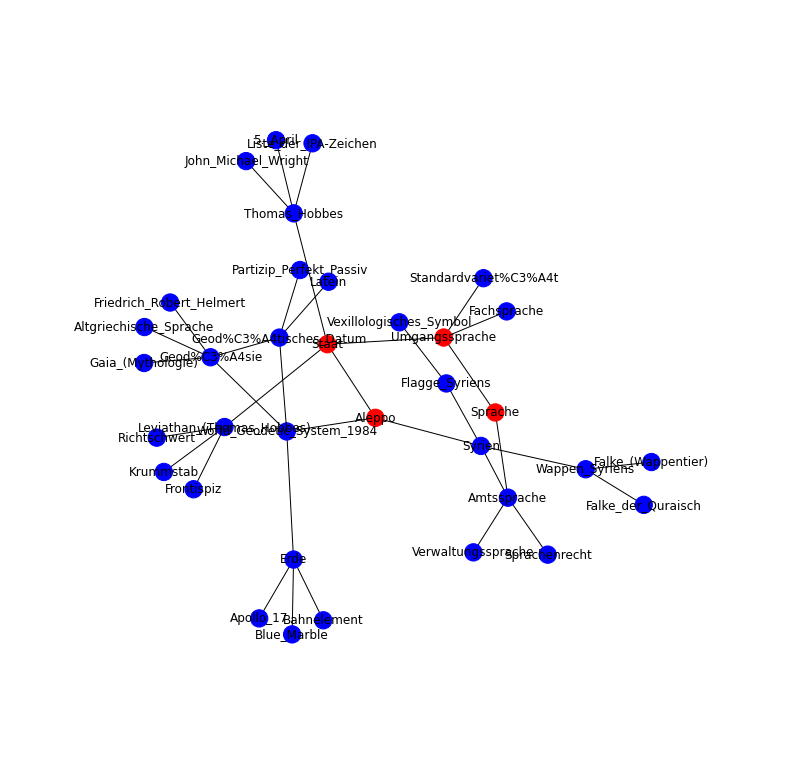

In [12]:
word = input("Von welchem Artikel soll analysiert werden?")
ziel = input("Was suchen sie in analysiert?")
end(word,ziel)